In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-ticks')
%matplotlib inline


Lets pick up where we left.

In [2]:
medical = pd.read_pickle("data/medical.p")

In [3]:
# The file includes socio-demographic data, including 
# health insurance and various aspects of health care
# touchpoints for the respondent group of a survey
# conducted in the USA.

# The collection includes 35072 observations and 27 variables:
  
# UMARSTAT – Marital status recode
# UCUREMP – Currently has employer coverage
# UCURNINS – Currently uninsured
# USATMED – Satisfied with quality of medical care
# URELATE – Number of relatives in household
# REGION – region
# STATE - state
# HHID – Household identification number
# FHOSP – In hospital overnight last year
# FDENT – Dental visits last year
# FEMER – Number of emergency room visits last year
# FDOCT – Number of doctor visits last year
# UIMMSTAT – Immigration status
# U_USBORN – U.S.- or foreign-born
# UAGE – Age topcoded
# U_FTPT – Full-time or part-time worker this year
# U_WKSLY – Weeks worked last year
# U_HRSLY – Hours worked per week last year
# U_USHRS – Hours worked per week this year
# HEARNVAL – Earnings amount last year - Household
# HOTHVAL – Household income, total exc. earnings
# HRETVAL – Retirement amount – Household
# HSSVAL – Social Security amount - Household
# HWSVAL – Wages and salaries amount – Household
# UBRACE – race
# GENDER – gender
# UEDUC3 – education level
# CEYES - color of eyes
# CHAIR - color of hair

## Linear regression
As always there are several ways to work with linear regression in Python. The basic ML library is sklearn. A more statisical/econometric package is statsmodels. Lets see how we can work with them with a simple example.

Lets see an example - we will try to explain  the number of Hours worked per week this year at first, the only explanatory variable will be age.

In [4]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [5]:

# Create linear regression object
reg = linear_model.LinearRegression(fit_intercept=False)

# Train the model using the training sets
reg.fit(medical["UAGE"].values.reshape(-1, 1), medical["U_USHRS"].values)

# Make predictions using the testing set
preds = reg.predict(medical["UAGE"].values.reshape(-1, 1))

# The coefficients
print('Coefficients: \n', reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(medical["U_USHRS"].values, preds))
# Explained variance score: 1 is perfect prediction
print('Variance score - R^2: %.2f' % r2_score(medical["U_USHRS"].values, preds))


Coefficients: 
 [ 0.98150639]
Mean squared error: 288.95
Variance score - R^2: -0.63


Not only it is tidious to work with the data set naming features like that but we have to calculate everythinng by hand. Lets see the econometric way in Python.
**Note.** In stats model the order of arguments X,y is reversed to y,X from sklearn.

In [1]:
import statsmodels.api as sm

In [7]:
mod = sm.OLS(medical["U_USHRS"], medical["UAGE"])
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                U_USHRS   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 1.968e+05
Date:                Wed, 28 Feb 2018   Prob (F-statistic):               0.00
Time:                        14:42:36   Log-Likelihood:            -1.4913e+05
No. Observations:               35072   AIC:                         2.983e+05
Df Residuals:                   35071   BIC:                         2.983e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
UAGE           0.9815      0.002    443.597      0.000       0.977       0.986
==============================================================================
Omnibus:                      846.194   Durbin-Watson:                   1.846
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1955.491
Skew:                           0.066   Prob(JB):                         0.00
Kurtosis:                       4.149   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
mod = sm.OLS(medical["U_USHRS"], medical[["UAGE",  "U_WKSLY", "U_HRSLY", "HEARNVAL",
                  "HOTHVAL", "HRETVAL", "HSSVAL", "HWSVAL",
                  "FDENT", "FEMER", "FDOCT"]])
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                U_USHRS   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 1.592e+05
Date:                Wed, 28 Feb 2018   Prob (F-statistic):               0.00
Time:                        14:42:37   Log-Likelihood:            -1.1332e+05
No. Observations:               35072   AIC:                         2.267e+05
Df Residuals:                   35061   BIC:                         2.268e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
UAGE           0.0109      0.003      4.053      0.000       0.006       0.016
U_WKSLY        0.0674      0.003     24.746      0.000       0.062       0.073
U_HRSLY        0.9148      0.002    377.894      0.000       0.910       0.920
HEARNVAL    2.247e-06   1.86e-06      1.208      0.227    -1.4e-06    5.89e-06
HOTHVAL    -4.815e-06   2.91e-06     -1.653      0.098   -1.05e-05    8.96e-07
HRETVAL     9.238e-06   6.29e-06      1.469      0.142   -3.09e-06    2.16e-05
HSSVAL      1.285e-05   7.04e-06      1.826      0.068   -9.43e-07    2.66e-05
HWSVAL     -5.931e-07   1.95e-06     -0.304      0.761   -4.42e-06    3.23e-06
FDENT          0.0571      0.022      2.609      0.009       0.014       0.100
FEMER          0.1139      0.042      2.699      0.007       0.031       0.197
FDOCT         -0.0188      0.009     -2.032      0.042      -0.037      -0.001
==============================================================================
Omnibus:                    14395.839   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1045790.232
Skew:                           1.115   Prob(JB):                         0.00
Kurtosis:                      29.658   Cond. No.                     1.23e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Using more variables we explain almost 100% of variability! (when we do not model with intercept) looks like number of hours on previous year is the most important explanatory variable - which is not surprising lets add some qualitative explanatory variables to the model.

**WARNING!**
If qualitative variables are stored in a data.frame as factors they will be encoded into respective dummy variables AUTOMATICALLY but only if use formul api.


In [9]:
import statsmodels.formula.api as smf

In [10]:
mod = smf.ols(formula='U_USHRS ~ UAGE + U_WKSLY + U_HRSLY + HEARNVAL + HOTHVAL + HRETVAL + HSSVAL + HWSVAL + FDENT + FEMER + FDOCT + UMARSTAT + UCUREMP + URELATE + REGION + FHOSP + UIMMSTAT + U_FTPT + UBRACE + GENDER + C(UEDUC3) + CEYES + CHAIR', data=medical)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                U_USHRS   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     4142.
Date:                Wed, 28 Feb 2018   Prob (F-statistic):               0.00
Time:                        14:42:38   Log-Likelihood:            -1.1026e+05
No. Observations:               35072   AIC:                         2.206e+05
Df Residuals:                   35032   BIC:                         2.209e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    11.2403      0.410     27.401      0.000      10.436      12.044
UMARSTAT[T.Married, do not live together]     0.8303      0.352      2.358      0.018       0.140       1.520
UMARSTAT[T.Married_live together]             0.0955      0.103      0.923      0.356      -0.107       0.298
UMARSTAT[T.Never married]                     0.5790      0.122      4.732      0.000       0.339       0.819
UMARSTAT[T.Partnership]                       0.0500      0.185      0.270      0.787      -0.312       0.412
UMARSTAT[T.Separated]                         0.2791      0.199      1.405      0.160      -0.110       0.668
UMARSTAT[T.Unknown]                          -0.6140      0.808     -0.760      0.447      -2.197       0.969
UMARSTAT[T.Widowed]                           0.5696      0.263      2.166      0.030       0.054       1.085
UCUREMP[T.Yes]                               -0.2474      0.076     -3.237      0.001      -0.397      -0.098
REGION[T.Northeast]                          -0.1911      0.087     -2.207      0.027      -0.361      -0.021
REGION[T.South]                              -0.0997      0.082     -1.216      0.224      -0.260       0.061
REGION[T.West]                               -0.1319      0.084     -1.574      0.116      -0.296       0.032
FHOSP[T.Yes]                                 -0.1287      0.119     -1.079      0.280      -0.362       0.105
UIMMSTAT[T.Foreign-born, non-citizen]        -0.3991      0.183     -2.180      0.029      -0.758      -0.040
UIMMSTAT[T.US-born citizen]                   0.2965      0.153      1.941      0.052      -0.003       0.596
U_FTPT[T.Part-time]                          -7.5472      0.100    -75.332      0.000      -7.744      -7.351
UBRACE[T.Asian/Pacific Islander]              0.0153      0.320      0.048      0.962      -0.612       0.643
UBRACE[T.Black]                               0.0104      0.274      0.038      0.970      -0.527       0.548
UBRACE[T.White]                               0.3048      0.270      1.129      0.259      -0.224       0.834
GENDER[T.Male]                                0.5987      0.066      9.014      0.000       0.469       0.729
C(UEDUC3)[T.1]                                0.2516      0.105      2.392      0.017       0.045       0.458
C(UEDUC3)[T.2]                                0.6068      0.116      5.238      0.000       0.380       0.834
CEYES[T.brown]                                0.0438      0.085      0.516      0.606      -0.122       0.210
CEYES[T.green]                                0.1628      0.113      1.441      0.150      -0.059       0.384
CEYES[T.hazel]                               -0.1141      0.103     -1.107      0.268      -0.316       0.088
CHA

Lets calculate predicted values based on the last model and chek the distribution of errors (differences between real and predicted values).

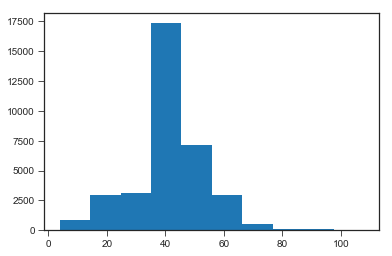

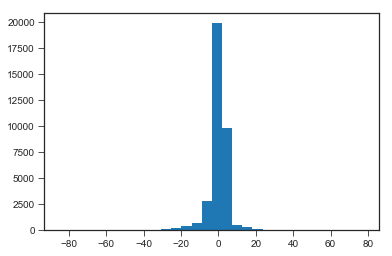

In [11]:
plt.hist(res.predict())
plt.show()
plt.hist(res.predict() - medical["U_USHRS"].values, bins=30)
plt.show()

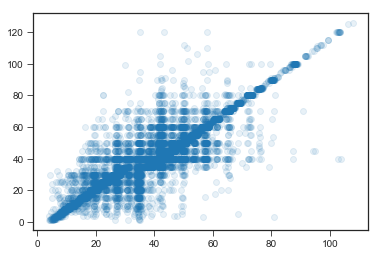

In [12]:
plt.scatter(res.predict(), medical["U_USHRS"].values, alpha=0.1)

## Binary logistic regression
We will now deal with the model classifying whether a person has medical insurance or not (UCURNINS - Currently uninsured)  based on set of characteristics

Logistic regression can be estimated using the function glm() (generalized linear models) we must provide information about:
- the distribution of the dependent variable - binomial
  means a distribution with two values
- a link function (logit)

**WARNING!** the glm() function also AUTOMATICALLY recodes categorical variables into dummies, assuming by default the first level of the variable as the reference when we use api formula.


In [13]:
mod = smf.glm(formula="UCURNINS ~ UMARSTAT + USATMED + URELATE + REGION + FHOSP + FDENT + FEMER + FDOCT + UIMMSTAT + UAGE + U_FTPT + U_WKSLY + U_USHRS + HOTHVAL + HRETVAL + HSSVAL + HWSVAL + UBRACE + UEDUC3 + GENDER", data=medical, family=sm.families.Binomial())
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                         
=============================================================================================
Dep. Variable:     ['UCURNINS[No]', 'UCURNINS[Yes]']   No. Observations:                35072
Model:                                           GLM   Df Residuals:                    35040
Model Family:                               Binomial   Df Model:                           31
Link Function:                                 logit   Scale:                             1.0
Method:                                         IRLS   Log-Likelihood:                -11182.
Date:                               Wed, 28 Feb 2018   Deviance:                       22364.
Time:                                       14:42:41   Pearson chi2:                 4.22e+04
No. Iterations:                                    6                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    -3.1098      0.208    -14.947      0.000      -3.518      -2.702
UMARSTAT[T.Married, do not live together]     0.3597      0.163      2.203      0.028       0.040       0.680
UMARSTAT[T.Married_live together]             0.8366      0.056     14.849      0.000       0.726       0.947
UMARSTAT[T.Never married]                     0.3113      0.064      4.891      0.000       0.187       0.436
UMARSTAT[T.Partnership]                      -0.3488      0.085     -4.119      0.000      -0.515      -0.183
UMARSTAT[T.Separated]                         0.0552      0.095      0.580      0.562      -0.131       0.242
UMARSTAT[T.Unknown]                          -0.7243      0.378     -1.916      0.055      -1.465       0.017
UMARSTAT[T.Widowed]                           0.1789      0.143      1.248      0.212      -0.102       0.460
REGION[T.Northeast]                           0.0397      0.056      0.705      0.481      -0.071       0.150
REGION[T.South]                              -0.7186      0.047    -15.412      0.000      -0.810      -0.627
REGION[T.West]                               -0.4015      0.049     -8.163      0.000      -0.498      -0.305
FHOSP[T.Yes]                                  0.2435      0.075      3.244      0.001       0.096       0.391
UIMMSTAT[T.Foreign-born, non-citizen]        -0.7392      0.088     -8.367      0.000      -0.912      -0.566
UIMMSTAT[T.US-born citizen]                   0.5805      0.080      7.284      0.000       0.424       0.737
U_FTPT[T.Part-time]                          -0.4990      0.058     -8.591      0.000      -0.613      -0.385
UBRACE[T.Asian/Pacific Islander]              1.0049      0.160      6.273      0.000       0.691       1.319
UBRACE[T.Black]                               0.4877      0.126      3.881      0.000       0.241       0.734
UBRACE[T.White]                               0.5185      0.117      4.418      0.000       0.288       0.748
GENDER[T.Male]                               -0.1578      0.039     -4.099      0.000      -0.233      -0.082
USATMED                                       0.3114      0.015     20.834      0.000       0.282       0.341
URELATE                                       0.0093      0.013      0.704      0.481      -0.017       0.035
FDENT                                         0.3195      0.015     21.437      0.000       0.290       0.349
FEMER                                        -0.0773      0.022     -3.519      0.000      -0.120      -0.034
FDOCT                                         0.1418      0.008     17.051      0.000       0.126       0.158
UAGE                                      

In case of statistical testing we see again that R is more friendly. We do have wald test but we need to provide a matirix for testing. It is more elastic as we can test different hypothesis not only for all coefficients toghether.

In [14]:
import numpy as np

In [15]:
res.wald_test(np.eye(len(res.params)))

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test: statistic=[[ 10996.58962025]], p-value=0.0>

Again we can see the distribution of fitted values.

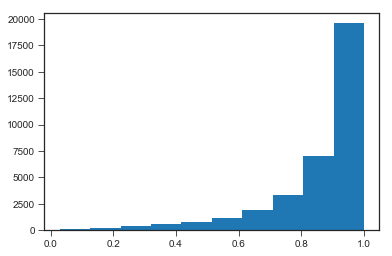

In [16]:
plt.hist(res.predict())
plt.show()

To get labels from probabilities we need to set the cutoff point and encode labels.

In [17]:
pdPreds = pd.Series(res.predict())
pdPreds.loc[pdPreds>0.5]=1
pdPreds.loc[pdPreds<1]=0
pdPreds.value_counts()

1.0    33134
0.0     1938
dtype: int64

## multinomial logistic regression
We will now switch to modelling the level of satisfaction of medical services - variable USATMED with multinomial logistic regression.
**Note.** We use yet another way of communicationg with statsmodels. We do not neet to use formulas api. Instead we can just use "from_formula" method.

In [18]:
mod = sm.MNLogit.from_formula("USATMED ~ UMARSTAT + URELATE + REGION + FHOSP + FDENT + FEMER + FDOCT + UIMMSTAT + UAGE + U_FTPT + U_WKSLY + U_USHRS + HOTHVAL + HRETVAL + HSSVAL + HWSVAL + UBRACE + UEDUC3 + GENDER", data=medical)
res = mod.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 1.065470
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                USATMED   No. Observations:                35072
Model:                        MNLogit   Df Residuals:                    34948
Method:                           MLE   Df Model:                          120
Date:                Wed, 28 Feb 2018   Pseudo R-squ.:                 0.02862
Time:                        14:42:43   Log-Likelihood:                -37368.
converged:                       True   LL-Null:                       -38469.
                                        LLR p-value:                     0.000
=============================================================================================================
                                USATMED=1       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                     0.6223      0.440      1.415      0.157      -0.240       1.484
UMARSTAT[T.Married, do not live together]    -0.5169      0.416     -1.243      0.214      -1.332       0.298
UMARSTAT[T.Married_live together]             0.2244      0.118      1.904      0.057      -0.007       0.455
UMARSTAT[T.Never married]                    -0.0161      0.139     -0.116      0.908      -0.289       0.257
UMARSTAT[T.Partnership]                      -0.2309      0.191     -1.208      0.227      -0.606       0.144
UMARSTAT[T.Separated]                        -0.1595      0.202     -0.788      0.431      -0.556       0.237
UMARSTAT[T.Unknown]                          -0.2899      0.739     -0.392      0.695      -1.738       1.158
UMARSTAT[T.Widowed]                          -0.5001      0.258     -1.941      0.052      -1.005       0.005
REGION[T.Northeast]                          -0.2952      0.112     -2.641      0.008      -0.514      -0.076
REGION[T.South]                              -0.1227      0.102     -1.197      0.231      -0.324       0.078
REGION[T.West]                               -0.1985      0.102     -1.942      0.052      -0.399       0.002
FHOSP[T.Yes]                                  0.1207      0.144      0.841      0.400      -0.161       0.402
UIMMSTAT[T.Foreign-born, non-citizen]         0.2562      0.200      1.281      0.200      -0.136       0.648
UIMMSTAT[T.US-born citizen]                   0.1906      0.165      1.158      0.247      -0.132       0.513
U_FTPT[T.Part-time]                          -0.2719      0.122     -2.220      0.026      -0.512      -0.032
UBRACE[T.Asian/Pacific Islander]              0.7341      0.388      1.893      0.058      -0.026       1.494
UBRACE[T.Black]                               0.1059      0.288      0.367      0.713      -0.459       0.671
UBRACE[T.White]                               0.1048      0.270      0.388      0.698      -0.425       0.634
GENDER[T.Male]                               -0.0231      0.081     -0.285      0.776      -0.182       0.136
URELATE                                       0.0445      0.030      1.496      0.135      -0.014       0.103
FDENT                                         0.0772      0.027      2.874      0.004       0.025       0.130
FEMER                                        -0.0415      0.039     -1.067      0.286      -0.118       0.035
FDOCT                                         0.0076      0.010      0.765      0.445      -0.012       0.027
UAGE                                         -0.0102      0.004     -2.718      0.007      -0.018      -0.003
U_WKSLY                                       0.0056      0.004      1.554      0.120      -0.001       0.013
U_USHRS                                      -0.0051      0.003     -1.457      0.145      -0.012       0.002
HOTHVAL                                   -6.078e-0

Because the dependent variable has 5 levels, four (K-1) equations are estimated - the first level of the variable (here "Very dissatisfied") is treated by default as the reference level.

Interpretation of the polynomial logit model is possible (odds ratios), but not entirely intuitive. Usually the model is used simply for prediction.


In [19]:
res.predict()

array([[ 0.02658787,  0.06242451,  0.06171029,  0.40721396,  0.44206337],
       [ 0.02353045,  0.05925758,  0.0172403 ,  0.34270914,  0.55726253],
       [ 0.03004405,  0.06633476,  0.01198021,  0.36150142,  0.53013957],
       ..., 
       [ 0.03371695,  0.06499969,  0.00605523,  0.32933981,  0.56588832],
       [ 0.04421018,  0.08554624,  0.01903611,  0.34844667,  0.5027608 ],
       [ 0.03070945,  0.06951327,  0.02106142,  0.34226504,  0.53645082]])

In [20]:
res.predict().shape

(35072, 5)

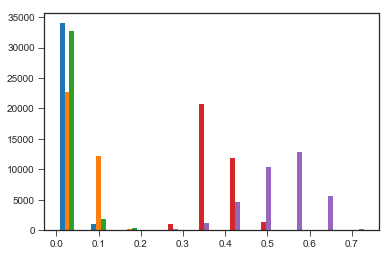

In [21]:
plt.hist(res.predict())
plt.show()

These are the probabilities that the variable will take a certain level, calculated on the basis of estimated model.

Model will predict this level for each observation which variable probability is the highest.

To get the predictad label we need to get the argument of the max element in each row.

(array([    81.,      0.,      0.,      0.,      0.,   3279.,      0.,
             0.,      0.,  31712.]),
 array([ 2. ,  2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ]),
 <a list of 10 Patch objects>)

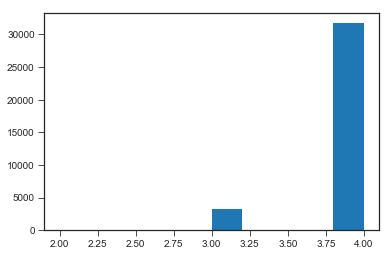

In [22]:
plt.hist(res.predict().argmax(axis=1))

model basically does NOT PREDICT the two lowest 
satisfaction levels at all !!!

It is clearly biased towards predicting
the highest level of satisfaction

## Exercises 2


### Exercise 2.1.
Wine Quality Data Set: "data/wines.csv"
source: https://archive.ics.uci.edu/ml/datasets/wine+quality
The file contains data on samples of white and red Portuguese wine 
Vinho Verde. 
Various physico-chemical characteristics of individual samples
are available as well as wine quality scores on a point scale (0-10) 
made by specialists.

estimate the linear regression model with the quality 
evaluation as the dependent variable,
treating the explained variable as quantitative.

KHÁM PHÁ DỮ LIỆU WINE QUALITY

Shape: (6497, 13)
Số observations: 6497
Số variables: 13

--- Thông tin dữ liệu ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  type                  6497 non-null   object 
 12  quality               6497 non-null   int64  
dtypes: float

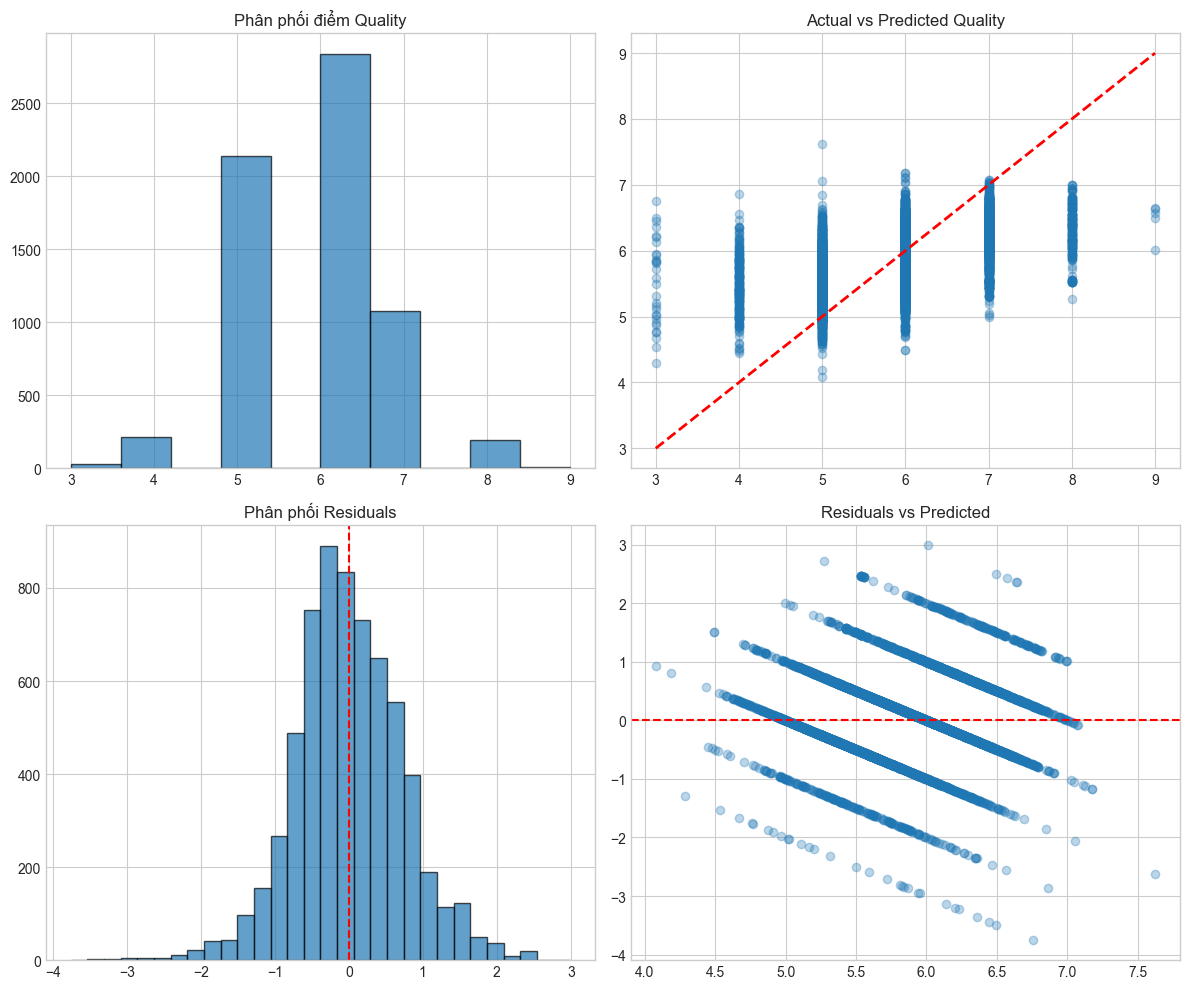

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, r2_score
import os

# Thiết lập style cho plot
plt.style.use('seaborn-v0_8-whitegrid')

# ============================================================
# 1. ĐỌC VÀ KHÁM PHÁ DỮ LIỆU
# ============================================================

# Đường dẫn dữ liệu (Relative path from notebook)
data_path = "data/wines.csv"

# Đọc dữ liệu
wines = pd.read_csv(data_path)

print("=" * 60)
print("KHÁM PHÁ DỮ LIỆU WINE QUALITY")
print("=" * 60)

# Shape
print(f"\nShape: {wines.shape}")
print(f"Số observations: {wines.shape[0]}")
print(f"Số variables: {wines.shape[1]}")

# Thông tin các cột
print("\n--- Thông tin dữ liệu ---")
print(wines.info())

# Xem dữ liệu đầu
print("\n--- 5 dòng đầu ---")
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', None)
print(wines.head())

# Thống kê mô tả
print("\n--- Thống kê mô tả ---")
print(wines.describe())

# ============================================================
# 2. XÂY DỰNG MÔ HÌNH LINEAR REGRESSION
# ============================================================

print("\n" + "=" * 60)
print("XÂY DỰNG MÔ HÌNH LINEAR REGRESSION")
print("=" * 60)

# Lấy danh sách các biến độc lập (loại bỏ biến quality và type)
feature_cols = [col for col in wines.columns if col not in ['quality', 'type']]
print(f"\nBiến phụ thuộc (Y): quality")
print(f"Biến độc lập (X): {feature_cols}")

# ---- Sử dụng statsmodels với formula API ----
# Tạo formula string
formula = "quality ~ " + " + ".join(feature_cols)
print(f"\nFormula: {formula[:80]}...")

# Fit model
model_formula = smf.ols(formula=formula, data=wines)
result_formula = model_formula.fit()

# In kết quả
print("\n--- KẾT QUẢ MÔ HÌNH ---")
print(result_formula.summary())

# ============================================================
# 3. DỰ ĐOÁN VÀ ĐÁNH GIÁ
# ============================================================

# Dự đoán
y_pred = result_formula.predict(wines)

# Tính các chỉ số đánh giá
mse = mean_squared_error(wines['quality'], y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(wines['quality'], y_pred)

print(f"\nMean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# ============================================================
# 4. VISUALIZATION
# ============================================================

print("\n" + "=" * 60)
print("TẠO BIỂU ĐỒ...")
print("=" * 60)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
residuals = wines['quality'] - y_pred

# Plot 1: Histogram of Quality
axes[0, 0].hist(wines['quality'], bins=10, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Phân phối điểm Quality')

# Plot 2: Predicted vs Actual
axes[0, 1].scatter(wines['quality'], y_pred, alpha=0.3)
axes[0, 1].plot([wines['quality'].min(), wines['quality'].max()], [wines['quality'].min(), wines['quality'].max()], 'r--', lw=2)
axes[0, 1].set_title('Actual vs Predicted Quality')

# Plot 3: Histogram of Residuals
axes[1, 0].hist(residuals, bins=30, edgecolor='black', alpha=0.7)
axes[1, 0].axvline(x=0, color='r', linestyle='--')
axes[1, 0].set_title('Phân phối Residuals')

# Plot 4: Residuals vs Predicted
axes[1, 1].scatter(y_pred, residuals, alpha=0.3)
axes[1, 1].axhline(y=0, color='r', linestyle='--')
axes[1, 1].set_title('Residuals vs Predicted')

plt.tight_layout()
plt.show()


### Exercise 2.2.
Titanic passengers data – 1310 observations and 15 variables:
```
passenger_id – Unique passenger id
pclass – Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
survived – Survival (0 = No, 1 = Yes)
name – Name and SUrname
sex – Sex (0 = Male, 1 = Female)
age – Age in years
sibsp – of siblings / spouses aboard the Titanic
parch – of parents / children aboard the Titanic
ticket – Ticket number
fare – Passenger fare
cabin – Cabin number
embarked – Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
boat – Lifeboat (if survived)
body – Body number (if did not survive and body was recovered)
home.dest – Home/Destination
```

estimate logistic regression model that can be used to 
explain the probability of survival (survived = 1).

lets load medical_care data after transformations
applied last week 


Loading data from: data/titanic.csv
KHÁM PHÁ DỮ LIỆU TITANIC
Shape: (1309, 15)
Số observations: 1309
Số variables: 15
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  1309 non-null   int64  
 1   pclass        1309 non-null   int64  
 2   survived      1309 non-null   int64  
 3   name          1309 non-null   object 
 4   sex           1309 non-null   int64  
 5   age           1046 non-null   float64
 6   sibsp         1309 non-null   int64  
 7   parch         1309 non-null   int64  
 8   ticket        1309 non-null   object 
 9   fare          1308 non-null   float64
 10  cabin         295 non-null    object 
 11  embarked      1307 non-null   object 
 12  boat          486 non-null    object 
 13  body          121 non-null    float64
 14  home.dest     745 non-null    object 
dtypes: float

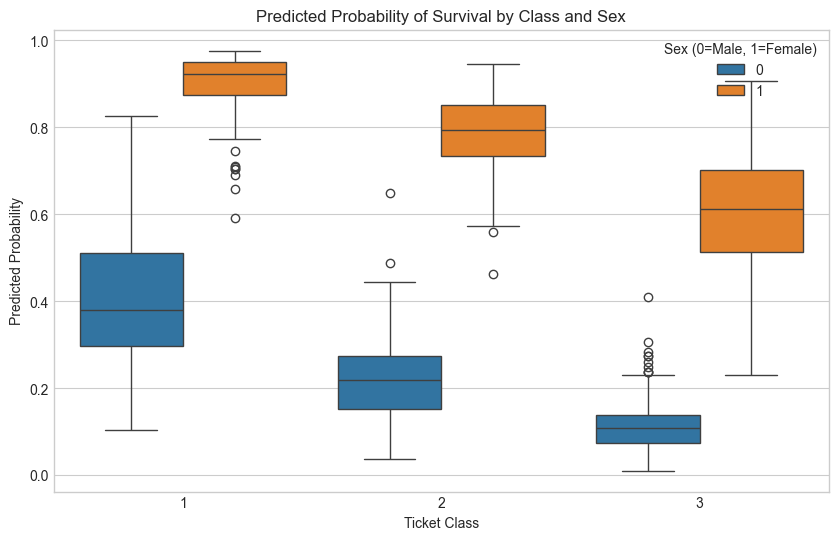

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os

# 1. Load Data
# 1. Load Data
# Note: Jupyter notebooks do not support __file__, so we use a relative path directly
data_path = "data/titanic.csv"

# Fallback absolute path if needed (though relative usually works in this project structure)
if not os.path.exists(data_path):
    print(f"Warning: '{data_path}' not found. Please ensure the notebook is in the correct directory.")


print(f"Loading data from: {data_path}")
df = pd.read_csv(data_path)

# 2. Data Exploration
print("="*60)
print("KHÁM PHÁ DỮ LIỆU TITANIC")
print("="*60)
print(f"Shape: {df.shape}")
print(f"Số observations: {df.shape[0]}")
print(f"Số variables: {df.shape[1]}")
print("-" * 30)
print(df.info())
print("-" * 30)
print(df.describe())
print("-" * 30)
print(df.head())

# 3. Data Cleaning & Preprocessing
# Target = survived
# Predictors of interest: pclass, sex, age, sibsp, parch, fare, embarked
# DROP identifiers/text: passenger_id, name, ticket, cabin, home.dest
# DROP leakage: boat, body (these indicates survival/death directly)

keep_cols = ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
df_clean = df[keep_cols].copy()

# Handle Missing Values
print("\nMissing values before cleaning:")
print(df_clean.isnull().sum())

# Drop rows with missing values (especially age and embarked)
df_clean = df_clean.dropna()
print(f"\nShape after dropping NaN: {df_clean.shape}")

# 'sex' is already numeric (0/1). 'pclass' is 1,2,3. 'embarked' is string (C, Q, S).
# Statsmodels formula API handles categorical variables automatically with C() syntax.

# 4. Logistic Regression Model
print("="*60)
print("XÂY DỰNG MÔ HÌNH LOGISTIC REGRESSION")
print("="*60)

# Formula: survived ~ pclass + sex + age + sibsp + parch + fare + embarked
# Note: Using C(pclass) to treat class as categorical, though it is ordinal.
# Note: Sex is 0/1, so it can be treated as numeric or categorical C(sex). 
# Since dictionary says 0=Male, 1=Female, pos coef means higher prob for female.

formula = 'survived ~ C(pclass) + sex + age + sibsp + parch + fare + C(embarked)'
print(f"Formula: {formula}")

try:
    model = smf.logit(formula=formula, data=df_clean)
    results = model.fit()
    print(results.summary())
    
    # 5. Interpretation (Odds Ratios)
    print("\n--- ODDS RATIOS (e^coef) ---")
    # Exponentiate coefficients to get Odds Ratios
    odds_ratios = np.exp(results.params)
    print(odds_ratios)
    
    # 6. Evaluation (optional simple confusion matrix on training data)
    print("\n--- GIÁ TRỊ DỰ ĐOÁN (Training Set) ---")
    df_clean['prob_survived'] = results.predict(df_clean)
    df_clean['pred_survived'] = (df_clean['prob_survived'] > 0.5).astype(int)
    
    confusion_matrix = pd.crosstab(df_clean['survived'], df_clean['pred_survived'], 
                                   rownames=['Actual'], colnames=['Predicted'])
    print(confusion_matrix)
    
    accuracy = (df_clean['survived'] == df_clean['pred_survived']).mean()
    print(f"\nAccuracy: {accuracy:.4f}")

except Exception as e:
    print(f"Lỗi khi chạy mô hình: {e}")

# Visualization (optional but good for report)
# Plot impact of Pclass and Sex on Survival Probability using seaborn
if 'prob_survived' in df_clean.columns:
    try:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='pclass', y='prob_survived', hue='sex', data=df_clean)
        plt.title('Predicted Probability of Survival by Class and Sex')
        plt.ylabel('Predicted Probability')
        plt.xlabel('Ticket Class')
        plt.legend(title='Sex (0=Male, 1=Female)')
        plt.show()
    except ImportError:
        print("Seaborn not installed, skipping plot.")
    except Exception as e:
        print(f"Error plotting: {e}")


### Exercise 2.3.
Wine Quality Data Set: "data/wines.csv"

estimate the multinomial logistic regression model with 
the quality evaluation as the dependent variable,
treating the explained variable as qualitative.

Loading data from: data/wines.csv
EXERCISE 2.3 - MULTINOMIAL LOGISTIC REGRESSION (WINES)
Classes: [3, 4, 5, 6, 7, 8, 9]

--- Fitting Statsmodels MNLogit ---
Optimization terminated successfully.
         Current function value: 1.057105
         Iterations: 472
         Function evaluations: 473
         Gradient evaluations: 473
                          MNLogit Regression Results                          
Dep. Variable:                quality   No. Observations:                 6497
Model:                        MNLogit   Df Residuals:                     6419
Method:                           MLE   Df Model:                           72
Date:                Sun, 18 Jan 2026   Pseudo R-squ.:                  0.1701
Time:                        16:53:39   Log-Likelihood:                -6868.0
converged:                       True   LL-Null:                       -8275.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
           quality=4       coef    s

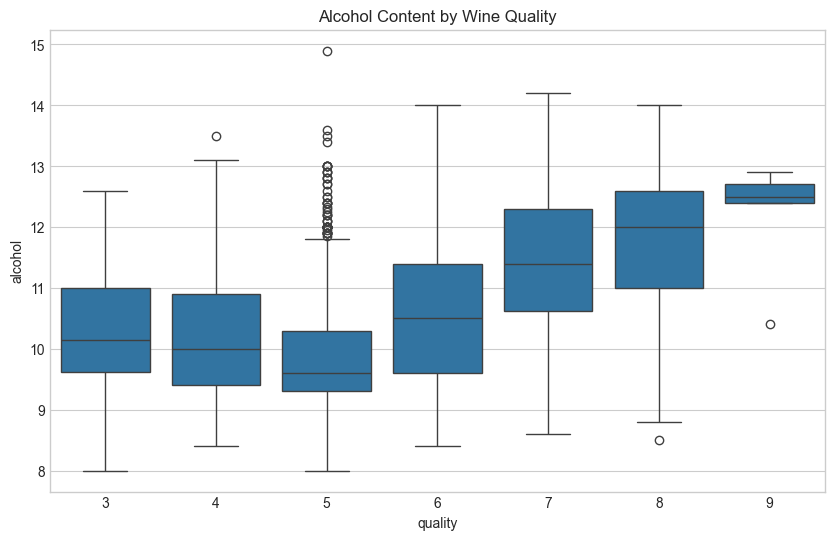

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import os

# 1. Load Data
data_path = "data/wines.csv"
print(f"Loading data from: {data_path}")

if not os.path.exists(data_path):
    print(f"Error: '{data_path}' not found.")
else:
    df = pd.read_csv(data_path)

    # 2. Data Exploration & Preprocessing
    print("="*60)
    print("EXERCISE 2.3 - MULTINOMIAL LOGISTIC REGRESSION (WINES)")
    print("="*60)
    
    # Target: 'quality'
    # Encoding 'type'
    df_clean = df.copy()
    df_clean['type_code'] = df_clean['type'].apply(lambda x: 1 if x == 'red' else 0)
    
    # Define predictors
    feature_cols = [c for c in df_clean.columns if c not in ['quality', 'type']]
    
    X = df_clean[feature_cols]
    y = df_clean['quality']
    
    # Standardize features
    scaler = StandardScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    X_scaled = sm.add_constant(X_scaled)
    
    # Get sorted unique class labels for mapping predictions later
    classes = sorted(y.unique())
    print(f"Classes: {classes}")
    
    # 3. Model Estimation (Statsmodels MNLogit)
    print("\n--- Fitting Statsmodels MNLogit ---")
    try:
        mod = sm.MNLogit(y, X_scaled)
        res = mod.fit(maxiter=1000, method='bfgs')
        print(res.summary())
        
        # 4. Evaluation
        print("\n--- Evaluation ---")
        # Predict on same data
        y_pred_probs = res.predict(X_scaled)
        
        # MNLogit predict returns probabilities for each class index (0, 1, 2...)
        # We need to map these indices back to the original class labels (3, 4, 5...)
        y_pred_indices = np.argmax(y_pred_probs.values, axis=1)
        y_pred = [classes[i] for i in y_pred_indices]
        
        acc = accuracy_score(y, y_pred)
        print(f"Accuracy: {acc:.4f}")
        
        print("\nConfusion Matrix (Rows=True, Cols=Predicted):")
        labels = classes
        cm = confusion_matrix(y, y_pred, labels=labels)
        print(pd.DataFrame(cm, index=labels, columns=labels))
        
    except Exception as e:
        print(f"Error fitting Statsmodels MNLogit: {e}")
        # Fallback skipped for brevity if statsmodels works, but good to have in mind.

    # 5. Visualization
    try:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='quality', y='alcohol', data=df)
        plt.title('Alcohol Content by Wine Quality')
        plt.show()
    except Exception as e:
        print(f"Plotting error: {e}")
